<a href="https://colab.research.google.com/github/Andersonsstr/Exemplos-Simples-Machine-Learn-Sklearn-/blob/main/Diagnosticando_Diabetes_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics

Descrição: Esta base de dados é original do Instituto Nacional de Doenças da Diabetes, Digestivas e dos Rins (National Institute of Diabetes and Digestive and Kidney Disease). O objetivo desta base de dados é para realizar uma predição baseada em medidas de diagnóstico se um paciente possui ou não diabetes.

fonte da explicação: https://docs.lemonade.org.br/pt-br/spark/base-de-dados/

Conhecendo as features:



*   Pregnancies: Número de vezes grávida
*   Glucose: Concentração plasmática de glicose por 2 horas em teste oral de tolerância à glicose
*   BloodPressure: Pressão arterial diastólica (mm Hg)
*   SkinThickness: Espessura da dobra da pele do tríceps (mm)
*   Insulin: 2-Hour serum insulin (mu U/ml)
*   BMI: Índice de massa corporal (peso em kg / (altura em m)^2)
*   DiabetesPedigreeFunction: Função de pedigree de diabetes
*   Age: Idade
*   class (Outcome): 0 = Negativo e 1 = Positivo



#Pré-Processamento

In [2]:
uri = "https://raw.githubusercontent.com/a-coders-guide-to-ai/a-coders-guide-to-neural-networks/master/data/diabetes.csv"
dados = pd.read_csv(uri)
dados.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print('Amostras e Features:', dados.shape)

Amostras e Features: (768, 9)


In [4]:
#Mapeando as nomenclaturas das colunas para deixar com os nomes mais amigáveis
mapa = {
    "Pregnancies" : "gravidez",
    "Glucose" : "glicose",
    "BloodPressure" : "pressao_arterial",
    "SkinThickness" : "espessura_da_pele",
    "Insulin" : "insulina",
    "BMI" : "imc",
    "DiabetesPedigreeFunction" : "dpf",
    "Age" : "idade",
    "Outcome" : "resultado"
}

In [5]:
dados = dados.rename(columns = mapa)
dados.head()

,gravidez,glicose,pressao_arterial,espessura_da_pele,insulina,imc,dpf,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gravidez           768 non-null    int64  
 1   glicose            768 non-null    int64  
 2   pressao_arterial   768 non-null    int64  
 3   espessura_da_pele  768 non-null    int64  
 4   insulina           768 non-null    int64  
 5   imc                768 non-null    float64
 6   dpf                768 non-null    float64
 7   idade              768 non-null    int64  
 8   resultado          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dados.isnull().sum()

gravidez             0
glicose              0
pressao_arterial     0
espessura_da_pele    0
insulina             0
imc                  0
dpf                  0
idade                0
resultado            0
dtype: int64

In [8]:
dados.describe()

,gravidez,glicose,pressao_arterial,espessura_da_pele,insulina,imc,dpf,idade,resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Verificando a quantidade valores zerados em colunas específicas
valores_zerados = dados[["glicose","pressao_arterial","espessura_da_pele","insulina","imc"]] == 0
print(valores_zerados.sum())

glicose                5
pressao_arterial      35
espessura_da_pele    227
insulina             374
imc                   11
dtype: int64


In [10]:
#Substituir valores zerados por valor indefinido 
dados[["pressao_arterial","glicose","imc"]] = dados[["pressao_arterial","glicose","imc"]].replace(0, np.NaN)
#Substituir valores indefinidos pelo valor médio
dados.fillna(dados.mean(), inplace=True)

In [11]:
dados[["espessura_da_pele","insulina"]] = dados[["espessura_da_pele","insulina"]].replace(0, np.NaN)

In [12]:
dados.describe()

,gravidez,glicose,pressao_arterial,espessura_da_pele,insulina,imc,dpf,idade,resultado
count,768.000000,768.000000,768.000000,541.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,10.476982,118.775855,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
#Swap da coluna de resultado para facilitar na leitura dos gráficos
troca = {
    0 : 'Negativo',
    1 : 'Positivo'
}
dados['resultado'] = dados.resultado.map(troca)
dados.head()

,gravidez,glicose,pressao_arterial,espessura_da_pele,insulina,imc,dpf,idade,resultado
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,Positivo
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,Negativo
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,Positivo
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,Negativo
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,Positivo


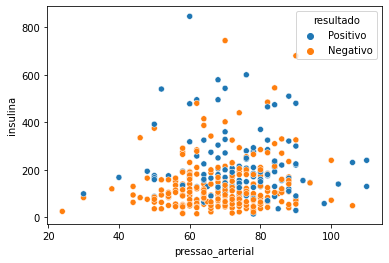

In [14]:
sns.scatterplot(x="pressao_arterial", y="insulina", hue="resultado", data=dados)

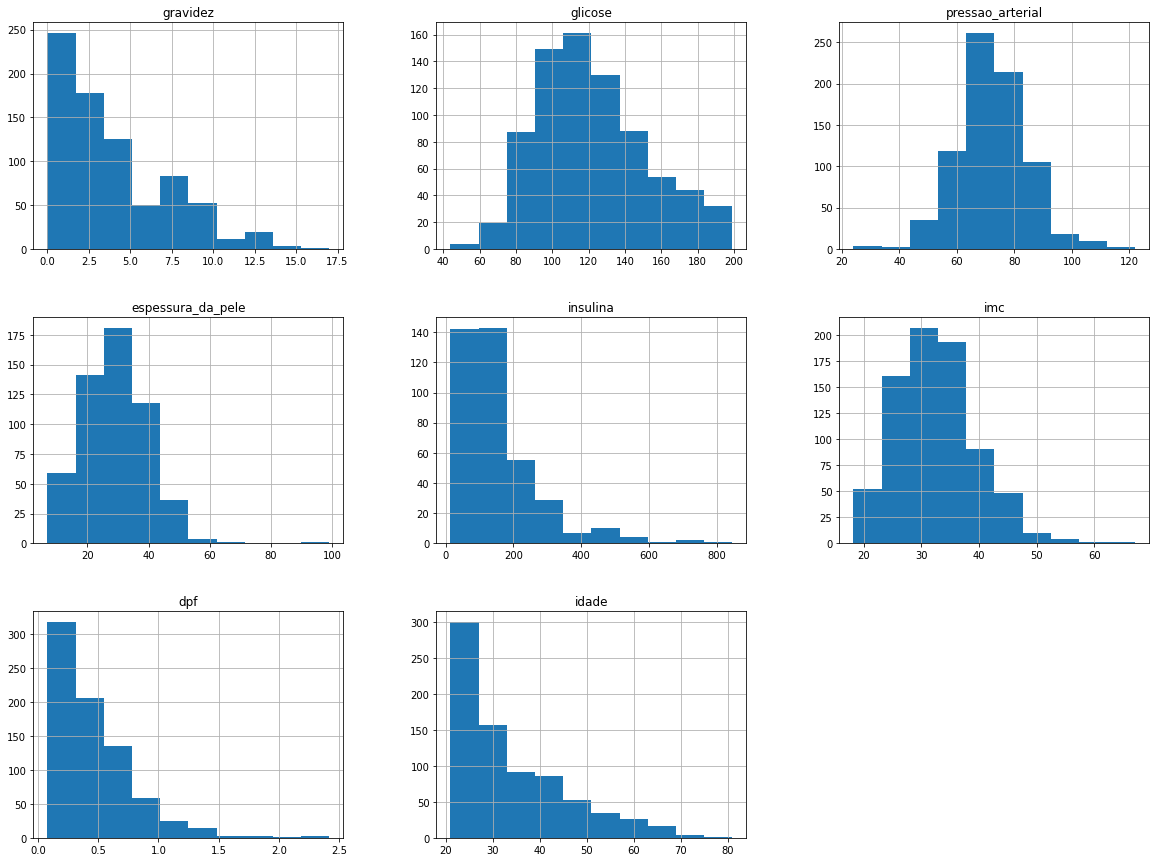

In [15]:
fig = dados.hist(figsize = (20,15))

In [16]:
#Swap da coluna de resultado para facilitar na leitura dos gráficos
troca = {
    'Negativo' : 0,
    'Positivo' : 1
}

dados['resultado'] = dados.resultado.map(troca)
dados.head()

,gravidez,glicose,pressao_arterial,espessura_da_pele,insulina,imc,dpf,idade,resultado
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [17]:
x = dados[['gravidez', 'glicose', 'pressao_arterial', 'imc', 'dpf', 'idade']]
y = dados['resultado']

In [18]:
#np.random.seed já deixa o random states definido por padrão, assim não precisa definir o random stats em bibliotecadas que já usam o numpy
np.random.seed(42)

#Dividir dados de treino e teste

In [19]:
from sklearn.model_selection import train_test_split
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)

In [20]:
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))

Treinaremos com 576 elementos e testaremos com 192 elementos


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

#BaseLine

In [22]:
from sklearn.dummy import DummyClassifier

In [23]:
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100
print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 58.33%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [24]:
dummy_frequent = DummyClassifier(strategy='most_frequent')
dummy_frequent.fit(treino_x, treino_y)
acuracia = dummy_frequent.score(teste_x, teste_y) * 100
print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 65.10%


#Linear SVC

In [25]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [26]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:
acuracia = accuracy_score(teste_y, previsoes) * 100
F1 =  metrics.f1_score(teste_y, previsoes) * 100
AUCROC = metrics.roc_auc_score(teste_y, previsoes) * 100

In [28]:
print('Matriz de Confusão\n', metrics.confusion_matrix(teste_y, previsoes)) 
print("\nAcurácia \n %.2f%%" % acuracia)
print("\nF1 \n %.2f%%" % F1)
print("\nAUCROC \n %.2f%%" % AUCROC)

Matriz de Confusão
 [[104  21]
 [ 33  34]]

Acurácia 
 71.88%

F1 
 55.74%

AUCROC 
 66.97%


#SVC

In [29]:
from sklearn.svm import SVC
modelo = SVC(C = 0.1, kernel='rbf', gamma = 0.0001)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

In [30]:
acuracia = accuracy_score(teste_y, previsoes) * 100
F1 =  metrics.f1_score(teste_y, previsoes) * 100
AUCROC = metrics.roc_auc_score(teste_y, previsoes) * 100

In [31]:
print('Matriz de Confusão\n', metrics.confusion_matrix(teste_y, previsoes)) 
print("\nAcurácia \n %.2f%%" % acuracia)
print("\nF1 \n %.2f%%" % F1)
print("\nAUCROC \n %.2f%%" % AUCROC)

Matriz de Confusão
 [[125   0]
 [ 67   0]]

Acurácia 
 65.10%

F1 
 0.00%

AUCROC 
 50.00%


#Random Forest

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

In [34]:
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 71.35%


In [35]:
from sklearn.tree import export_graphviz
import graphviz

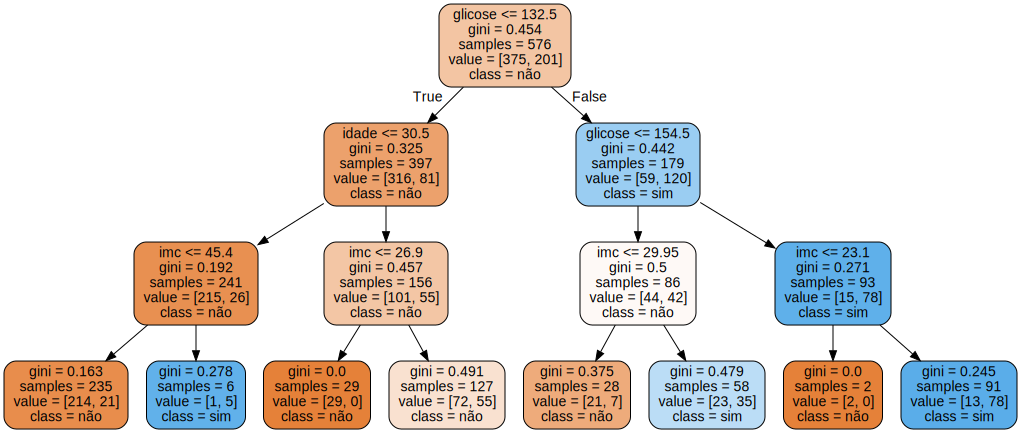

In [36]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico

#GridSearch

In [37]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

In [38]:
#definindo hiperparâmetros
hiperparam = {'kernel':('sigmoid', 'rbf'), 'C':[0.01, 1, 10]}

#definindo o tipo de validacao cruzada e o numero de folds
cv_strat = StratifiedKFold(n_splits = 10)

#instânciando meu classificador
classifier = SVC()

#definindo a estrategia de score a partir da metrica f1
f1 = make_scorer(f1_score)

#instanciando e modelando o grid search com os hiperparametros e a validação definidas.
grid_cv = GridSearchCV(classifier, hiperparam, cv = cv_strat, scoring = f1)
grid_cv.fit(treino_x, treino_y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 1, 10], 'kernel': ('sigmoid', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score), verbose=0)

In [39]:
#vamos olhar para todos os resultados encontrados!
print('Resumo de todos os resultados encontrados:\n\n', grid_cv.cv_results_)

Resumo de todos os resultados encontrados:

 {'mean_fit_time': array([0.01243119, 0.00949569, 0.00811784, 0.00910356, 0.00812941,
       0.01183181]), 'std_fit_time': array([0.00185878, 0.00165516, 0.00025171, 0.00218775, 0.00059742,
       0.00120545]), 'mean_score_time': array([0.0027766 , 0.0023679 , 0.0018713 , 0.00200632, 0.00187037,
       0.00205169]), 'std_score_time': array([9.60212382e-04, 7.75752940e-04, 5.06995637e-05, 4.88057978e-04,
       2.52820672e-04, 3.46361760e-04]), 'param_C': masked_array(data=[0.01, 0.01, 1, 1, 10, 10],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['sigmoid', 'rbf', 'sigmoid', 'rbf', 'sigmoid', 'rbf'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01, 'kernel': 'sigmoid'}, {'C': 0.01, 'kernel': 'rbf'}, {'C': 1, 'kernel': 'sigmoid'}, {'C': 1, 'kernel': 'rbf'}, {'C'

In [40]:
#vamos olhar para os melhores resultados encontrados pelo Grid Search
print('Melhor resultado f1:', grid_cv.best_score_)
print('\n\nMelhor configuração de hiperparâmetros:', grid_cv.best_params_)

print( '\n\nConfigurações de todos os hiperparâmetros do melhor estimado encontrado pelo GridSearch: \n', grid_cv.best_estimator_)

Melhor resultado f1: 0.6263036726875016


Melhor configuração de hiperparâmetros: {'C': 1, 'kernel': 'rbf'}


Configurações de todos os hiperparâmetros do melhor estimado encontrado pelo GridSearch: 
 SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


#SVC com os parametros do GridSearch aplicados

In [41]:
from sklearn.svm import SVC
modelo = SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

In [42]:
acuracia = accuracy_score(teste_y, previsoes) * 100
F1 =  metrics.f1_score(teste_y, previsoes) * 100
AUCROC = metrics.roc_auc_score(teste_y, previsoes) * 100

In [43]:
print('Matriz de Confusão\n', metrics.confusion_matrix(teste_y, previsoes)) 
print("\nAcurácia \n %.2f%%" % acuracia)
print("\nF1 \n %.2f%%" % F1)
print("\nAUCROC \n %.2f%%" % AUCROC)

Matriz de Confusão
 [[107  18]
 [ 34  33]]

Acurácia 
 72.92%

F1 
 55.93%

AUCROC 
 67.43%
